In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data_x=data[[col for col in data.columns if col!='Outcome']]
data_y=data['Outcome']

In [5]:
data_x.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [6]:
data_y.head(1)

0    1
Name: Outcome, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)

In [8]:
%time model=RandomForestClassifier(1000)

Wall time: 0 ns


In [9]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
pred=model.predict(x_test)

In [11]:
metrics.accuracy_score(y_test,pred)

0.7316017316017316

In [12]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()

In [13]:
%time model1.fit(x_train,y_train)

Wall time: 31.2 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
metrics.accuracy_score(y_test,model1.predict(x_test))

0.6666666666666666

In [15]:
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)
    model1=DecisionTreeClassifier()
    model1.fit(x_train,y_train)
    print(metrics.accuracy_score(y_test,model1.predict(x_test)))
    

0.7056277056277056
0.7359307359307359
0.6493506493506493
0.6796536796536796
0.7056277056277056
0.6623376623376623
0.6926406926406926
0.6493506493506493
0.7316017316017316
0.7229437229437229


In [16]:
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.3)

In [17]:
data=pd.read_csv('diabetes_reg_data.csv')

In [18]:
data.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0


In [19]:
data_x1=data[[col for col in data.columns if col!='target']]

In [20]:
data_y1=data['target']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(data_x1,data_y1,test_size=0.3)

In [22]:
model=RandomForestRegressor(1000).fit(x_train,y_train)

In [23]:
model.predict(x_test)

array([226.03 ,  96.014, 236.326, 145.843,  82.386, 234.821, 178.091,
       263.555, 188.08 , 220.972,  79.84 , 156.352, 133.493, 189.132,
       229.773, 203.755,  80.467, 107.842, 113.77 ,  91.579, 237.208,
       107.293,  82.222, 159.171,  73.934, 220.816, 116.784, 243.551,
        81.869, 150.915, 179.138, 141.721, 252.622, 220.707, 183.733,
        84.784, 159.538, 274.799, 143.243, 225.02 , 186.347, 150.016,
       182.525, 263.144,  85.368, 240.4  , 122.54 , 148.79 ,  82.085,
       110.966, 266.403, 180.688, 240.069, 189.144, 141.832, 109.936,
       162.709, 248.944, 229.292, 174.165, 177.247,  85.787,  74.543,
        91.161, 219.161, 138.547, 159.702, 158.823, 101.354,  81.522,
       164.129, 174.417, 207.119, 233.074, 150.094, 220.533,  83.266,
        86.865, 157.697, 153.656, 177.882,  80.734, 235.969, 269.459,
       149.115, 177.355,  89.428, 116.719, 129.651,  98.487, 169.942,
       156.467, 123.099, 228.764, 224.925, 202.56 , 120.523, 150.767,
       112.425,  80.

In [24]:
metrics.mean_squared_error(y_test,model.predict(x_test))

3918.304748473684

In [25]:
metrics.mean_absolute_error(y_test,model.predict(x_test))

50.71418796992482

In [26]:
np.mean(np.abs(model.predict(x_test)-y_test)/y_test)

0.4458812505720524

In [27]:
metrics.mean_squared_log_error(y_test,model.predict(x_test))

0.2132726998294436

In [36]:
l1=[]
for i in range(30):
    x_train,x_test,y_train,y_test=train_test_split(data_x1,data_y1,test_size=0.3)
    model=RandomForestRegressor(1000).fit(x_train,y_train)
    model.predict(x_test)
    print(metrics.mean_squared_error(y_test,model.predict(x_test)))
    print()
    
    
    print(metrics.mean_absolute_error(y_test,model.predict(x_test)))
    print()
    
    
    print(np.mean(np.abs(model.predict(x_test)-y_test)/y_test))
    l1.append(metrics.mean_squared_error(y_test,model.predict(x_test)))
    
    

4117.934382842106

52.28177443609023

0.4692014349182118
3295.4942497744364

47.5407969924812

0.4681122791604836
3432.6886052857144

48.09477443609022

0.4728350773248858
3135.999063894737

46.33685714285714

0.44490726772662614
3334.3888992781954

47.62807518796992

0.3978069257385955
3195.603704406015

46.93554887218045

0.4455872722105966
3178.340260781955

45.44669172932331

0.4041693308494955
3321.9638193233086

47.7489022556391

0.47341471937013896
3654.7074000225566

49.591646616541354

0.4602001566754204
3406.659284030075

47.576466165413535

0.4313460279501079
3153.3750570827065

45.88914285714285

0.4138828175583769
3245.1697831203005

45.775601503759404

0.43927017943180374
3354.4408059774437

45.53940601503759

0.3427729629965631
3799.6309494360908

50.59524060150377

0.3970908632595457
3191.531768639098

46.31161654135338

0.39992607708742606
3262.9961839548873

46.817503759398505

0.4320430397518094
3092.3403462406013

45.68237593984962

0.45625179150920003
3321.00506603

In [35]:
l2=[]
for i in range(30):
    x_train,x_test,y_train,y_test=train_test_split(data_x1,data_y1,test_size=0.3)
    model=DecisionTreeRegressor().fit(x_train,y_train)
    model.predict(x_test)
    print(metrics.mean_squared_error(y_test,model.predict(x_test)))
    print()
    print(metrics.mean_absolute_error(y_test,model.predict(x_test)))
    print()
    print(np.mean(np.abs(model.predict(x_test)-y_test)/y_test))
    l2.append(metrics.mean_squared_error(y_test,model.predict(x_test)))
    
    
    

6664.255639097744

61.3984962406015

0.5136462174775716
6626.714285714285

63.16541353383459

0.627313900091889
7157.4060150375935

64.42857142857143

0.5831379823352916
4853.601503759399

53.6015037593985

0.48783845108541735
7410.473684210527

66.57894736842105

0.6046443491427568
6433.210526315789

65.34586466165413

0.5976726683018304
5272.571428571428

57.909774436090224

0.43880881351309314
6369.045112781955

65.03007518796993

0.5492890698795926
6875.631578947368

63.78195488721804

0.5242076801016632
6779.037593984963

63.3984962406015

0.5632708496887392
7470.774436090225

70.26315789473684

0.5319484393147627
5740.045112781955

59.26315789473684

0.4619251032318051
7113.353383458647

67.06766917293233

0.610124382812187
6603.0526315789475

66.30075187969925

0.5689402314517716
8302.812030075187

71.02255639097744

0.6222069719306127
6702.473684210527

62.42857142857143

0.537209339304189
6861.744360902256

63.11278195488722

0.5112752218017196
5752.9699248120305

59.751879699

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
import seaborn as sns


In [38]:
k=pd.DataFrame(columns=['f1','class'])

In [39]:
k['f1']=l1+l2
k['class']=['dt']*30+['rf']*30

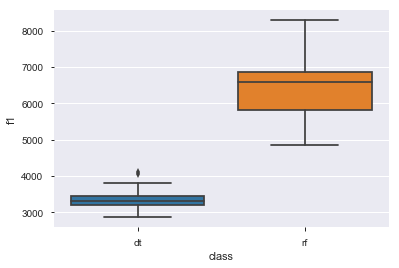

In [43]:
sns.boxplot(k['class'],k['f1'],orient='V')

In [45]:
x_train,x_test,y_train,y_test=train_test_split(data_x1,data_y1,test_size=0.3)
%time model=RandomForestRegressor(1000).fit(x_train,y_train)
model.predict(x_test)
print(metrics.mean_squared_error(y_test,model.predict(x_test)))

Wall time: 7.46 s
3061.8468191654138


In [46]:
x_train,x_test,y_train,y_test=train_test_split(data_x1,data_y1,test_size=0.3)
%time model=DecisionTreeRegressor().fit(x_train,y_train)
model.predict(x_test)
print(metrics.mean_squared_error(y_test,model.predict(x_test)))

Wall time: 78.1 ms
6004.766917293233
